# <strong>第三次作品：分類器評比 PART1 - 葡萄酒資料</strong>
學號：711233117

姓名：楊廷紳

 <font color=skyblue>作品目標</font>：
 
 這個作品的目標是利用機器學習技術，根據紅酒的化學特性和相關數據，預測紅酒的品質分類。通過收集和分析紅酒的各種屬性，例如酸度、酒精含量、揮發性酸度等，以及對應的品質評分，我們可以建立一個分類模型，幫助判斷紅酒的品質等級。

在這個作品中，將採用多個機器學習算法，如羅吉斯迴歸、支持向量機、類神經網路等，通過訓練模型來預測紅酒的品質分類。使用已有的紅酒數據集，將其切分為訓練集和測試集，並對模型進行評估和優化，以確保模型的準確性和泛化能力。

通過完成這個作品，我們的目標是建立一個準確的分類模型，可以根據紅酒的特徵預測其品質等級，進而幫助消費者和業界對紅酒進行更好的選擇和評價。
<hr>

### **匯入需要使用之套件**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression , LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import  GridSearchCV,StratifiedShuffleSplit
from sklearn.metrics import accuracy_score , classification_report

如果不加入 warning 套件，找尋最佳參數時會出現 warning 。設定種子碼，確保切割資料集時執行不同次模型結果一樣。

In [20]:
import warnings
import random
warnings.filterwarnings('ignore') #處理 warning 結果
# 設置種子碼
random.seed(42)


### 載入葡萄酒資料集

In [21]:
import pandas as pd
import numpy as np

# Read data
df = pd.read_excel('/Users/samuel/Documents/vscode_python/Wine.xlsx')

### **原始資料進行切割並標準化資料**

In [22]:
X = np.array(df.iloc[:, :-1]) # 排 除 最 後 一 欄 標 籤
y = np.array(df.iloc[:, -1]) # 標籤欄

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardize data ＃因為 pca 所以需要進行標準化
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

### <font color=yellow> 標準化的用意 </font>

數值型資料標準化的目的在於將不同特徵的數值範圍調整為相似的尺度，以確保在建立模型時每個特徵都能夠對模型的訓練起到相同的作用。這是因為如果特徵的數值範圍相差太大，可能會導致某些特徵對模型的訓練影響更大，從而影響模型的性能和準確性。

<hr>

## <font color=orange> 原始資料模型訓練 </font> 
該段落會以原始資料，經過標準化後進行模型訓練。會先做一次預測，觀察所給定的模型參數效果。再使用測試網格搜索最佳參數範圍。

### <font color=orange> 羅吉斯迴歸 (Logistic Regression) </font> 

在 Scikit-learn 中的羅吉斯模型中，`solver = 'liblinear'` 參數指定了用於優化問題的一種求解方式。對於二元分類，這是一個重要的參數。在羅吉斯模型中，要最小化的目標是損失函數，以找到最佳的模型參數（例如，權重和偏差）。solver 參數指定了用於最小化成本函數的算法。

1. <font color=yellow>liblinear</font> :
- 適用於小型資料集的優化器，適用於二元邏輯迴歸和多元邏輯迴歸。
- 此優化器使用了優化的坐標下降算法，對於稀疏數據集效果很好，但對於大型數據集可能效率較低。

2. <font color=yellow>newton-cg</font> :
- 為牛頓共軛梯度法的一種變體，適用於二元和多元邏輯迴歸。
- 此優化器在大多數情況下效果很好，但對於大型數據集的計算成本可能較高。

3. <font color=yellow>lbfgs</font>：
- 為限制性（L-BFGS）最佳化的一種實現，適用於二元和多元邏輯迴歸。
- 此優化器對於中等和大型數據集效果通常很好，但對於具有較高維度特徵的數據集可能效率較低。

4. <font color=yellow>sag</font>：
- 為隨機平均梯度下降的一種變體，適用於二元和多元邏輯迴歸。
- 此優化器通常適用於大型數據集，尤其是當數據集的特徵數量非常大時。

5. <font color=yellow>saga</font>：
- 為 sag 求解器的一種變體，專門針對大型數據集和多元分類問題進行了優化。
- 在大型數據集和高維度特徵下通常比其他求解器更有效。


In [23]:
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
#solver = 'lbfgs' # ’lbfgs’ is the default
solver = 'liblinear'
# solver = ’newton−cg’
clf_original = LogisticRegression(solver = solver, **opts)
clf_original.fit(X_train_, y_train)
y_pred = clf_original.predict(X_test_)

# 測 試 資 料 之 準 確 率 回 報
print(f'Test set classification accuracy of Logistic Regression:{accuracy_score(y_test, y_pred):.2%}\n')
print(f'Test set classification accuracy of Logistic Regression:{clf_original.score(X_test_, y_test):.2%}\n')
print('---------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

[LibLinear]iter  1 act 6.054e+01 pre 5.289e+01 delta 1.495e+00 f 8.595e+01 |g| 1.038e+02 CG   3
iter  2 act 1.117e+01 pre 8.960e+00 delta 1.495e+00 f 2.541e+01 |g| 2.717e+01 CG   3
iter  3 act 3.435e+00 pre 2.832e+00 delta 1.495e+00 f 1.423e+01 |g| 9.795e+00 CG   3
iter  4 act 6.157e-01 pre 5.456e-01 delta 1.495e+00 f 1.080e+01 |g| 3.099e+00 CG   3
iter  5 act 3.137e-02 pre 3.032e-02 delta 1.495e+00 f 1.018e+01 |g| 6.085e-01 CG   4
iter  6 act 2.537e-04 pre 2.534e-04 delta 1.495e+00 f 1.015e+01 |g| 4.392e-02 CG   4
iter  7 act 1.352e-06 pre 1.352e-06 delta 1.495e+00 f 1.015e+01 |g| 3.689e-03 CG   4
iter  8 act 1.556e-08 pre 1.556e-08 delta 1.495e+00 f 1.015e+01 |g| 3.275e-04 CG   5
iter  1 act 5.634e+01 pre 4.865e+01 delta 1.467e+00 f 8.595e+01 |g| 8.323e+01 CG   3
iter  2 act 1.207e+01 pre 9.587e+00 delta 1.467e+00 f 2.961e+01 |g| 2.298e+01 CG   3
iter  3 act 3.978e+00 pre 3.291e+00 delta 1.467e+00 f 1.754e+01 |g| 8.396e+00 CG   4
iter  4 act 6.564e-01 pre 5.909e-01 delta 1.467e+00 f 

會分成三種不同的指標計算結果是因為葡萄酒資料的分類目標變數主要有三個種類，根據感興趣的 (Positive) 種類去計算各指標。

<font color=orange> 使用網格搜索並配合交叉驗證找尋羅吉斯最佳參數。 </font>

如果資料集不大，那麼 'liblinear' 是不錯的選擇。但當資料集較大時，可能需要考慮其他的優化器，比如 'sag'、'saga'、'newton-cg'、'lbfgs'，這些求解器對於大型資料集有更好的效率。

In [24]:
from datetime import datetime

# # Get the current date and time
# now = datetime.now()
# # Format the date and time as a string
# now_str = now.strftime("%Y_%m_%d_%H_%M_%S")
# results_file = 'D:/shallow_ml/' + now_str + '.csv' #動態檔名

opts = dict(tol = 1e-6, max_iter = int(1e6)) # parameters for LogisticRegression
params_log = {'solver':['lbfgs', 'liblinear', 'newton-cg','sag','saga'], 'C':[0.1, 1, 10]} # parameters for GridSearchCV
# parameters = {'solver':['lbfgs', 'liblinear', 'newton-cg','sag','saga']}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3,random_state=0) # 5-fold CV
grid_lr_best = GridSearchCV(estimator=LogisticRegression(**opts), param_grid=params_log, cv=cv, scoring=['accuracy','f1_macro'], refit="accuracy")
grid_lr_best.fit(X_train_, y_train)
# grid.fit(X, y)

# # output
# cv_logistic = pd.DataFrame(data = grid.cv_results_) 
# cv_logistic.to_csv(results_file) 

print(grid_lr_best.best_params_)                            
print(grid_lr_best.best_score_)                                 
print(grid_lr_best.best_estimator_)   

{'C': 0.1, 'solver': 'lbfgs'}
0.9894736842105264
LogisticRegression(C=0.1, max_iter=1000000, tol=1e-06)


網格搜索會找尋給定的參數後，計算出預測最好的參數組合。在此筆資料中，羅吉斯迴歸模型達到九成的準確率。

### <font color=orange> 支持向量機 (Support Vector Machine)</font> 

SVM 在 Scikit-learn 中的實現並沒有一個叫做 solver 的參數。相反，SVM 使用不同的內部優化算法，這些算法通常是特定的問題類型（線性或非線性）和核函數（如線性、多項式、RBF）所固有的。

Scikit-learn 中，如果想使用線性核的支持向量機，可以使用 LinearSVC，而不是 SVC。對於 LinearSVC，solver 參數確實存在，但不是用於指定內部優化算法的，而是用於控制模型的優化器的選擇。solver 參數在 LinearSVC 中的可選值通常包括 'liblinear'、'sag' 和 'saga'。

In [25]:
opts = dict(C = 10, tol = 1e-6, max_iter = int(1e6))

svm_clf_original = SVC(kernel = 'rbf', **opts)
svm_clf_original.fit(X_train_, y_train)
y_pred = svm_clf_original.predict(X_test_)

print(f'Test set classification accuracy of Support Vector Machine:{accuracy_score(y_test, y_pred):.2%}\n')
print(f'Test set classification accuracy of Support Vector Machine:{svm_clf_original.score(X_test_, y_test):.2%}\n')
print('---------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

Test set classification accuracy of Support Vector Machine:98.15%

Test set classification accuracy of Support Vector Machine:98.15%

---------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



<font color=orange> 使用網格搜索並配合交叉驗證找尋 SVM 最佳參數。 </font>

SVM 的核函數選擇：
1. <font color=yellow>線性核函數（Linear Kernel）</font>：最簡單的核函數之一，它將數據點映射到更高維的空間，但保持數據的原始特徵不變。它在處理線性可分的數據時非常有效。 

2. <font color=yellow>多項式核函數（Polynomial Kernel）</font>：將數據映射到更高維空間，通過多項式特徵擴展來處理非線性數據。多項式核函數有一個參數d，表示多項式的次數。

3. <font color=yellow>高斯核函數 (Gaussian Kernel 或 RBF Kernel) </font>：也稱為徑向基函數（Radial Basis Function，RBF）核函數。它將數據映射到無限維的空間，通過計算每個數據點到特定參考點的距離來實現非線性映射。高斯核函數有一個參數 γ，控制了 RBF 函數的寬度，影響著模型的複雜度。

4. <font color=yellow>sigmoid 核函數（Sigmoid Kernel）</font>：將數據映射到高維空間，通過計算數據之間的 sigmoid 函數來實現非線性映射。這個核函數的使用不如前幾個核函數那麼普遍。

In [26]:
opts = dict(tol = 1e-6, max_iter = int(1e6)) # parameters for SVM
params_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.1, 1, 10, 100]} 

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3,random_state=0) # 5-fold CV
grid_svm_best = GridSearchCV(estimator=SVC(**opts), param_grid=params_svm, cv=cv, scoring=['accuracy','f1_macro'], refit="accuracy")
grid_svm_best.fit(X_train_, y_train)

print(grid_svm_best.best_params_)                            
print(grid_svm_best.best_score_)                                 
print(grid_svm_best.best_estimator_)   

{'C': 0.1, 'kernel': 'linear'}
0.9894736842105264
SVC(C=0.1, kernel='linear', max_iter=1000000, tol=1e-06)


此筆資料中，SVM 模型的最佳參數使得模型達到九成的準確率。

### <font color=orange> 類神經網路 (Artificial Neural Network)</font> 

類神經網路所需使用件為 Scikit-learn 的 MLPClassifier ，用於實現多層感知器（MLP）類神經網絡模型，通常用於分類問題。MLP 是一種前向反饋人工神經網絡，具有一個或多個隱藏層，每個隱藏層包含多個神經元。它通過學習具有權重的非線性函數來進行學習。

In [27]:
hidden_layers = (50, )
activation = 'relu'
opts = dict(hidden_layer_sizes = hidden_layers, verbose = False, activation = activation, tol = 1e-6, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning # solver = ’lbfgs’ # not suitable here
solver = 'lbfgs' # default solver
Ann_clf_original = MLPClassifier(solver = solver, random_state = 8, **opts)
Ann_clf_original.fit(X_train_, y_train)
y_pred= Ann_clf_original.predict(X_test_)

print(f'Test set classification accuracy of Neural Network:{accuracy_score(y_test, y_pred):.2%}\n')
print(f'Test set classification accuracy of Neural Network:{Ann_clf_original.score(X_test_, y_test):.2%}\n')
print('---------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

Test set classification accuracy of Neural Network:98.15%

Test set classification accuracy of Neural Network:98.15%

---------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



<font color=orange> 使用網格搜索並配合交叉驗證找尋 ANN 最佳參數。 </font>

MLPClassifier 的主要參數包括：
1. <font color=yellow>hidden_layer_sizes</font> ：一個元組，指定每個隱藏層的神經元數量。
2. <font color=yellow>activation</font> ：激活函數，可以是 'identity' 、 'logistic' 、 'tanh' 或 'relu'。
3. <font color=yellow>solver</font> ：優化器，可以是 'lbfgs' 、 'sgd' 或 'adam'。
4. <font color=yellow>random_state</font> ：隨機種子碼，用於初始化神經網絡的權重。

In [28]:
opts = dict(tol = 1e-6, max_iter = int(1e6)) # parameters for SVM
params_ann = {'hidden_layer_sizes':[(20,), (30,), (30,30)], #, (50, 30)
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam']} 

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3,random_state=0) # 5-fold CV
grid_ann_best = GridSearchCV(estimator=MLPClassifier(**opts), param_grid=params_ann, cv=cv, scoring=['accuracy','f1_macro'], refit="accuracy")
grid_ann_best.fit(X_train_, y_train)

print(grid_ann_best.best_params_)                            
print(grid_ann_best.best_score_)                                 
print(grid_ann_best.best_estimator_)   

{'activation': 'identity', 'hidden_layer_sizes': (30,), 'solver': 'adam'}
0.9947368421052631
MLPClassifier(activation='identity', hidden_layer_sizes=(30,), max_iter=1000000,
              tol=1e-06)


此筆資料中，ANN 模型的最佳參數使得模型達到九成的準確率。

模型經過網格搜索，在準確率方面都有提升。代表經過不同的參數組合訓練模型，可以優化模型。

<hr>

## <font color=orange> 降維資料模型訓練 </font> 

對紅酒數據進行降維可以幫助我們更好地理解數據的結構並提取主要特徵。其中包含了不同化學特徵的紅酒樣本以及其對應的品質等級。使用主成分分析對紅酒資料進行降維，並選擇主成分個數解釋足夠的變異量。在此段落直接使用網格搜索尋找模型最佳參數。

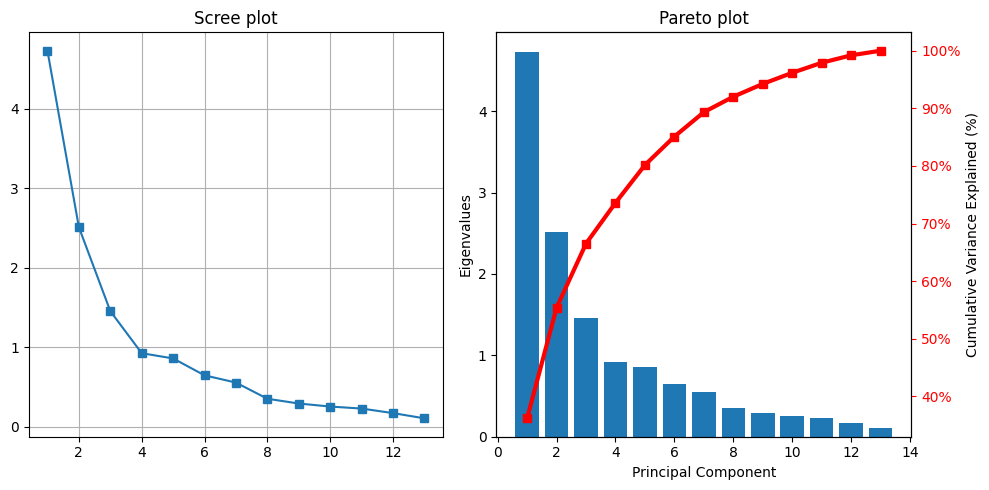

In [29]:
import matplotlib.pyplot as plt
from numpy.linalg import eig
from matplotlib.ticker import PercentFormatter

ratings = np.array(df)
# Standardize the ratings
scaler = StandardScaler()
ratings_ = scaler.fit_transform(ratings)


# Assuming you already have defined ratings_ and calculated s_x_npfun
s_x_npfun = np.cov(ratings_[:, 0:13].T, bias=False)
w, v = eig(s_x_npfun)
idx = np.argsort(w)[::-1]
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with two subplots

# Scree plot
x = np.arange(1, 1+len(eigvals))
ax1.plot(x, eigvals, marker='s')
ax1.set_title('Scree plot')
ax1.grid(True)

# Pareto plot
ax2.bar(x, eigvals)
ax3 = ax2.twinx()
ax3.plot(x, eigvals.cumsum()/eigvals.sum()*100,
         marker='s', color='red', lw=3)
ax3.tick_params(axis='y', colors='red')
ax3.yaxis.set_major_formatter(PercentFormatter())
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Eigenvalues')
ax3.set_ylabel('Cumulative Variance Explained (%)')
ax2.set_title('Pareto plot')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

選擇 <font color=yellow>6</font> 個主成分達到超過 <font color=yellow>80%</font> 的變異量。

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6).fit(X_train_) #根據分析選擇個數
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)

 ### <font color=orange> PCA資料 - 羅吉斯模型</font> 

In [31]:
opts = dict(tol = 1e-6, max_iter = int(1e6)) 
params_log = {'solver':['lbfgs', 'liblinear', 'newton-cg','sag','saga'], 'C':[0.1, 1, 10]}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3,random_state=42) # 5-fold CV
grid_pca_lr_best = GridSearchCV(estimator=LogisticRegression(**opts), param_grid=params_log, cv=cv, scoring=['accuracy','f1_macro'], refit="accuracy")
grid_pca_lr_best.fit(Z_train, y_train)

print(grid_pca_lr_best.best_params_)                            
print(grid_pca_lr_best.best_score_)                                 
print(grid_pca_lr_best.best_estimator_)   

{'C': 10, 'solver': 'lbfgs'}
0.9842105263157895
LogisticRegression(C=10, max_iter=1000000, tol=1e-06)


 ### <font color=orange> PCA資料 - SVM模型</font> 

In [32]:
opts = dict(tol = 1e-6, max_iter = int(1e6)) # parameters for SVM
params_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.1, 1, 10, 100]} 

cv = StratifiedShuffleSplit(n_splits=6, test_size=0.3,random_state=42) # 5-fold CV
grid_pca_svm_best = GridSearchCV(estimator=SVC(**opts), param_grid=params_svm, cv=cv, scoring=['accuracy','f1_macro'], refit="accuracy")
grid_pca_svm_best.fit(Z_train, y_train)

print(grid_pca_svm_best.best_params_)                            
print(grid_pca_svm_best.best_score_)                                 
print(grid_pca_svm_best.best_estimator_)   

{'C': 1, 'kernel': 'rbf'}
0.986842105263158
SVC(C=1, max_iter=1000000, tol=1e-06)


 ### <font color=orange> PCA資料 - ANN模型</font> 

In [33]:
opts = dict(tol = 1e-6, max_iter = int(1e6)) # parameters for SVM
params_ann = {'hidden_layer_sizes':[(20,), (30,), (30,30)],
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam']} 

cv = StratifiedShuffleSplit(n_splits=6, test_size=0.3,random_state=42) # 5-fold CV
grid_pca_ann_best = GridSearchCV(estimator=MLPClassifier(**opts), param_grid=params_ann, cv=cv, scoring=['accuracy','f1_macro'], refit="accuracy")
grid_pca_ann_best.fit(Z_train, y_train)

print(grid_pca_ann_best.best_params_)                            
print(grid_pca_ann_best.best_score_)                                 
print(grid_pca_ann_best.best_estimator_)   

{'activation': 'identity', 'hidden_layer_sizes': (30,), 'solver': 'sgd'}
0.9824561403508772
MLPClassifier(activation='identity', hidden_layer_sizes=(30,), max_iter=1000000,
              solver='sgd', tol=1e-06)


<hr>

## <font color=orange> 最佳參數優化模型 </font> 

使用網格搜索(GridSearch)可以幫助我們找到最佳的機器學習模型及其對應的最佳參數組合。這個過程中，首先定義想要調整的模型和參數範圍，然後建立了 Pipeline，將模型與可能的資料處理步驟串聯起來。接著，使用 `GridSearchCV` 對象將這些信息傳遞給網格搜索，並指定交叉驗證折數。網格搜索會在給定的參數範圍內搜索最佳組合，通過比較各種參數組合的性能，找到最佳模型及其對應的最佳參數。最後，使用獲得的最佳模型對測試集進行預測，並評估模型的性能。這樣的過程幫助找到最優的機器學習模型，提高模型的準確性和泛化能力。基於探索的想法還是預測所有模型，觀察預測效果與訓練效果是否吻合。

In [34]:
y_pred_lr = grid_lr_best.predict(X_test_) #會自己搜尋最佳參數
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Test set classification accuracy of Logistic Regression:{accuracy_lr:.3%}\n')

y_pred_svm = grid_svm_best.predict(X_test_)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Test set classification accuracy of SVM:{accuracy_svm:.3%}\n')

y_pred_ann = grid_ann_best.predict(X_test_)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f'Test set classification accuracy of Neural Network:{accuracy_ann:.3%}\n')

y_pred_pca_lr = grid_pca_lr_best.predict(Z_test)
accuracy_pca_lr = accuracy_score(y_test, y_pred_pca_lr)
print(f'Test set classification accuracy of Logistic Regression with PCA:{accuracy_pca_lr:.3%}\n')

y_pred_pca_svm = grid_pca_svm_best.predict(Z_test)
accuracy_pca_svm = accuracy_score(y_test, y_pred_pca_svm)
print(f'Test set classification accuracy of SVM with PCA:{accuracy_pca_svm:.3%}\n')

y_pred_pca_ann = grid_pca_ann_best.predict(Z_test)
accuracy_pca_ann = accuracy_score(y_test, y_pred_pca_ann)
print(f'Test set classification accuracy of Neural Network with PCA:{accuracy_pca_ann:.3%}\n')

Test set classification accuracy of Logistic Regression:98.148%

Test set classification accuracy of SVM:96.296%

Test set classification accuracy of Neural Network:98.148%

Test set classification accuracy of Logistic Regression with PCA:96.296%

Test set classification accuracy of SVM with PCA:100.000%

Test set classification accuracy of Neural Network with PCA:98.148%



可以發現大部分的模型參數組合都獲得不錯的預測效果。接下來觀察模型混淆矩陣數值。以原始資料訓練的 ANN 模型，和以降維資料訓練的 ANN 模型為觀察對象。

In [38]:
y_pred_ann = grid_ann_best.predict(X_test_)
print(classification_report(y_test, y_pred_ann))
print('---------------------------------------------------------------------------')
y_pred_pca_ann = grid_pca_ann_best.predict(Z_test) #會自己搜尋最佳參數
print(classification_report(y_test, y_pred_pca_ann))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

---------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



<hr>

## <font color=orange> 結語 </font> 

當我們應用羅吉斯迴歸、支持向量機(SVM)和人工神經網絡(ANN)等模型時，混淆矩陣是一個重要的評估指標。這個矩陣提供了模型在不同類別上的預測效果，幫助我們評估模型的性能。

羅吉斯迴歸是一種線性分類器，它將輸入特徵與目標類別之間的關係建模為一個線性函數。支持向量機(SVM)是一種強大的分類器，它通過找到最大間隔超平面來分離不同類別的樣本。人工神經網絡(ANN)是一種基於生物神經網絡結構的模型，它通常用於處理複雜的非線性問題。

總歸來說，混淆矩陣是評估羅吉斯回歸、支持向量機和人工神經網絡等分類模型性能的重要工具。通過分析混淆矩陣，本作品獲得對模型在不同類別上的預測表現的深入理解，從而針對模型的優點和缺點進行更好的優化和改進。